## Table of Contents
#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Standardizing Data
#### 4. The elbow technique
#### 5. k-means clustering

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler #this is used for the standardization of the data

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'/Users/lianabulte/Career Foundry/2023 Boat Sales Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_boat_data_v4.csv'))

## 2. Data Cleaning

In [5]:
df.shape

(8394, 16)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Year Built,Length,Width,Material,Views from last 7 days,Orig Currency,Orig Price,Country,City,Price in Euros,Boat Class,Boat Status,Boat Fuel Type
0,0,0,Rigiflex power boats,2017,4.00,1.90,Not Disclosed,226,CHF,3337,Switzerland,Lake Geneva,3403.74,Motor Yacht,new boat from stock,Not Disclosed
1,1,1,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,EUR,3490,Germany,Bnningstedt,3490.00,Center console boat,new boat from stock,Not Disclosed
2,2,2,Pioner power boats,2020,3.00,1.00,Not Disclosed,64,DKK,25900,Denmark,Svendborg,3367.00,Sport Boat,new boat from stock,Not Disclosed
3,3,3,Linder power boats,2019,3.55,1.46,Aluminium,58,EUR,3399,Germany,Bayern,3399.00,Fishing Boat,new boat from stock,Not Disclosed
4,4,4,Not Disclosed,1999,6.20,2.38,Aluminium,474,CHF,3600,Switzerland,Neuenburgersee,3672.00,Catamaran,Used boat,Unleaded


In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Year Built,Length,Width,Views from last 7 days,Orig Price,Price in Euros
count,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8394.000000,8.394000e+03,8.394000e+03
mean,4201.771503,4672.805218,2004.771265,11.367566,3.478520,152.977722,2.831886e+05,2.632013e+05
std,2425.738527,2713.588227,16.823170,5.780303,1.173659,155.818301,9.141729e+05,8.644950e+05
min,0.000000,0.000000,1885.000000,1.040000,0.500000,15.000000,3.300000e+03,3.300000e+03
25%,2102.250000,2233.250000,1999.000000,7.482500,2.540000,71.000000,4.390000e+04,4.289025e+04
50%,4202.500000,4789.500000,2008.000000,10.170000,3.300000,110.000000,9.000000e+04,8.900000e+04
75%,6301.750000,7034.750000,2018.000000,13.677500,4.200000,177.000000,2.350000e+05,2.229413e+05
max,8403.000000,9245.000000,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


The range in prices are quite large in comparison to the views and the dimensions of the boath. Will need to standardize the variables prior to executing the elbow technique

In [9]:
#creating a df with only the necessary columns
df = df[['Length','Width','Views from last 7 days','Price in Euros']]

In [10]:
df

,Length,Width,Views from last 7 days,Price in Euros
0,4.00,1.90,226,3403.74
1,4.00,1.50,75,3490.00
2,3.00,1.00,64,3367.00
3,3.55,1.46,58,3399.00
4,6.20,2.38,474,3672.00
...,...,...,...,...
8389,6.00,1.62,288,5049.00
8390,6.30,2.44,1116,4998.00
8391,4.40,1.80,354,4499.00
8392,4.37,1.89,266,4300.00


### 3. Standardizing Data

In [11]:
# define standard scaler
scaler = StandardScaler()

In [12]:
# transform data
standardized_data = scaler.fit_transform(df)

In [13]:
# review standardized data
standardized_data

[[-1.27467449 -1.34503644  0.46866528 -0.30053735]
 [-1.27467449 -1.68587117 -0.50046989 -0.30043757]
 [-1.44768611 -2.1119146  -0.57106914 -0.30057986]
 ...
 [-1.20546985 -1.43024512  1.29018384 -0.29927034]
 [-1.2106602  -1.35355731  0.72538983 -0.29950055]
 [-1.34387914 -1.60066249  0.26328564 -0.30001464]]


In [14]:
# coverting the above set of numbers into dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)

In [16]:
# verifying the above worked
df

,Length,Width,Views from last 7 days,Price in Euros
0,-1.274674,-1.345036,0.468665,-0.300537
1,-1.274674,-1.685871,-0.500470,-0.300438
2,-1.447686,-2.111915,-0.571069,-0.300580
3,-1.352530,-1.719955,-0.609578,-0.300543
4,-0.894049,-0.936035,2.060357,-0.300227
...,...,...,...,...
8389,-0.928651,-1.583621,0.866588,-0.298634
8390,-0.876748,-0.884910,6.180786,-0.298693
8391,-1.205470,-1.430245,1.290184,-0.299270
8392,-1.210660,-1.353557,0.725390,-0.299501


## 4. Elbow Technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-33575.99999999997,
 -23281.124097722735,
 -17717.13374756533,
 -13721.574731733524,
 -10981.577602911573,
 -9467.55032491773,
 -8022.304290814725,
 -7219.392026198089,
 -6532.347925892727]

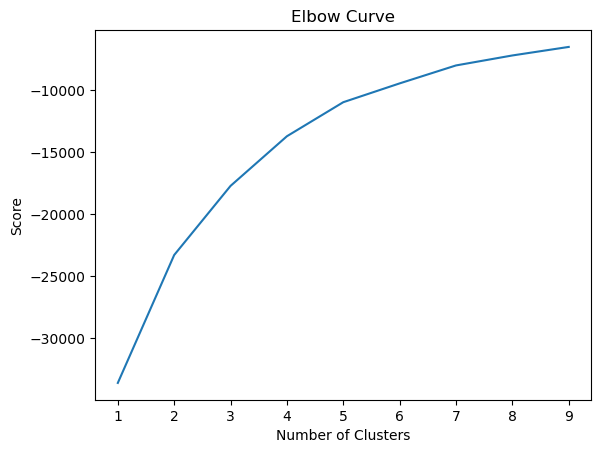

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The above plot looks like it could take 4 or 5 clusters. But i will go for 5 as there is still a steeper slop between 4 and 5 vs. 5 and 6. I also believe there is enough data points to support 5 clusters

## 5. K-means clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [22]:
df['clusters'] = kmeans.fit_predict(df)

In [23]:
df.head()

,Length,Width,Views from last 7 days,Price in Euros,clusters
0,-1.274674,-1.345036,0.468665,-0.300537,4
1,-1.274674,-1.685871,-0.500470,-0.300438,4
2,-1.447686,-2.111915,-0.571069,-0.300580,4
3,-1.352530,-1.719955,-0.609578,-0.300543,4
4,-0.894049,-0.936035,2.060357,-0.300227,3


In [24]:
df['clusters'].value_counts()

4    3926
0    3284
1     759
3     378
2      47
Name: clusters, dtype: int64

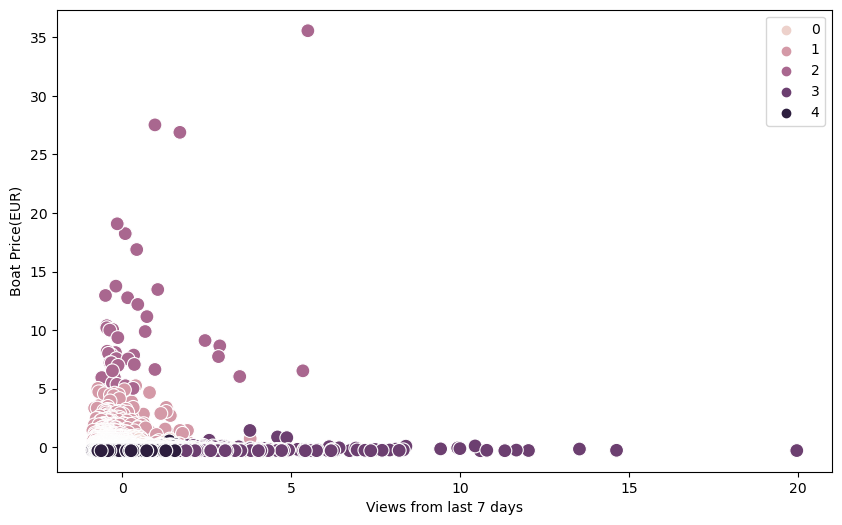

In [26]:
# Plot the clusters for the "Price in Euros" and "Views from last 7 days" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Views from last 7 days'], y=df['Price in Euros'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Views from last 7 days') # Label x-axis.
plt.ylabel('Boat Price(EUR)') # Label y-axis.
plt.show()

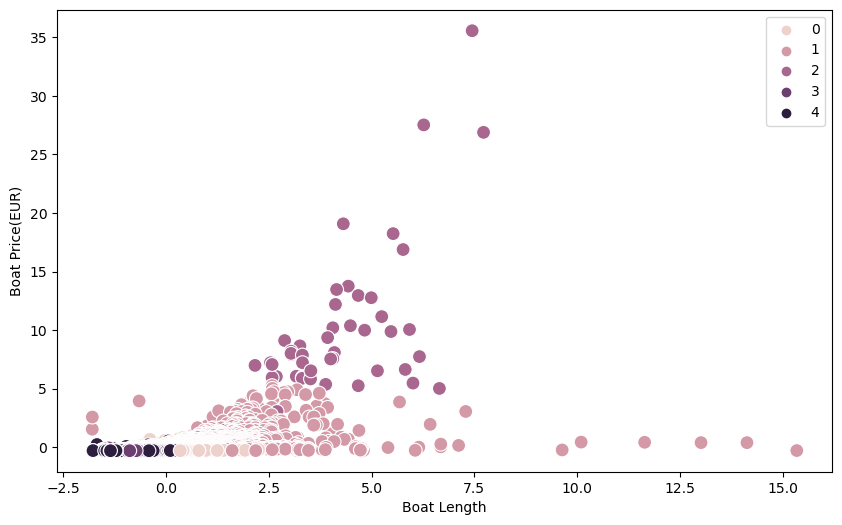

In [27]:
# Plot the clusters for the "Price in Euros" and "Length" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Length'], y=df['Price in Euros'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Boat Length') # Label x-axis.
plt.ylabel('Boat Price(EUR)') # Label y-axis.
plt.show()

Both graphs do not show a strong correlation between the respective variables and the price of a boat. There appears to be a very small positive trend for cluster #2 from the priciest group, where as the length of the boat increases so too does the cost. However this is not really the case for the other clusters

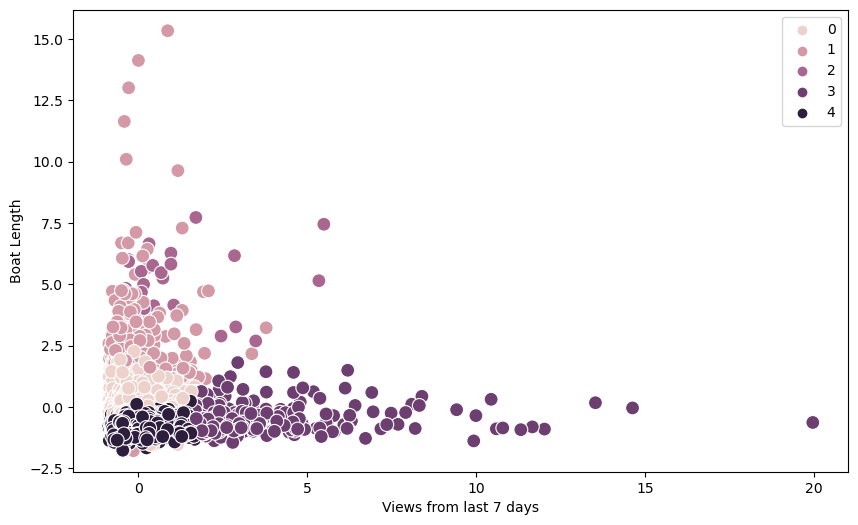

In [31]:
# Plot the clusters for the "Length" and "Views from last 7 days" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Views from last 7 days'], y=df['Length'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Views from last 7 days') # Label x-axis.
plt.ylabel('Boat Length') # Label y-axis.
plt.show()

I created an additional graph to review the boat length against the total views. And it is evident that cluster #3 is the predominant group in having the most views. This group price wise seems to be the cheapest (when cross referncing the first plot) with almost all of their points near the $0 line.

In [29]:
#assigning colours to each cluster group
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'beige'

In [30]:
df.groupby('cluster').agg({'Width':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Views from last 7 days':['mean', 'median'],
                          'Price in Euros':['mean', 'median']})

Width              Length           Views from last 7 days  \
                 mean    median      mean    median                   mean   
cluster                                                                      
beige        0.479799  0.444346  0.313300  0.275510              -0.285557   
dark purple -0.748890 -0.791180 -0.654507 -0.669134              -0.028207   
light pink   1.837615  1.662830  2.022159  1.773790              -0.303732   
pink         3.897111  3.349962  4.286176  4.059274               0.482321   
purple      -0.564633 -0.757097 -0.517337 -0.634532               3.323741   

                      Price in Euros            
               median           mean    median  
cluster                                         
beige       -0.384944      -0.048610 -0.102148  
dark purple -0.160310      -0.232525 -0.250313  
light pink  -0.442707       0.892763  0.609408  
pink        -0.128219      10.102893  7.908902  
purple       2.644406      -0.211414 -0.261022

As evident from the first two graphs, cluster #2(pink) is the expensive group of boats and this is also confirmed in the descriptive statistics table as Pink has the highest means and medians across all variables and clusters except for total views. This furter confirms that potential buyers are not really looking into expensive and potentially luxury boats.
Purple or cluster #3 is showing the highest mean and median for total views but is on the lower end in price and the boats are not that long. This so me indicates that buyers are looking to buy smaller or more compact boats.

These analysis further confirms that there are qualitative attributes of a boat that will be the primary driver in determining what makes a boat ad popular.
